In [1]:
from yolo import create_yolov1
from data.build import VOCDatasets
from cfg.voc import cfg
import os
from matplotlib import pyplot as plt
import cv2
import torch

In [12]:
class_label = ["aeroplane", "bicycle", "bird", "boat", "bottle", "bus", "car", "cat",
           "chair", "cow", "diningtable", "dog", "horse", "motorbike", "person",
           "pottedplant", "sheep", "sofa", "train", "tvmonitor"]


def draw_box(img,boxlist,conf=0.1):
    try:
        box = boxlist.bbox
    except:
        box = boxlist.box
    label = boxlist.get_field('labels')
    try:
        scores = boxlist.get_field('scores')
    except:
        scores = [1 for i in range(len(label))]
    
    for b,l,s in zip(box,label,scores):
        if s > conf:
            p1 = (int(b[0]),int(b[1]))
            p2 = (int(b[2]),int(b[3]))
            cv2.rectangle(img,p1,p2,(255,0,0),2)
            font = cv2.FONT_HERSHEY_SIMPLEX
            img = cv2.putText(img, class_label[int(l)], p1, font, 0.5, (255, 255, 0), 1)
            
    return img

In [8]:
dataset = VOCDatasets('./VOC2007_test.txt')

train_cfg = cfg['train_cfg']
model_cfg = cfg['model_cfg']
model_name = model_cfg['model_type']
out_dir = train_cfg['out_dir']
out_dir = out_dir + '/' + model_name
model = create_yolov1(model_cfg)
checkpoint = torch.load('{}/best_model.pth'.format(out_dir))['model']
data_dict = {k.replace('module.', ''): v for k, v in checkpoint.items()}
model.load_state_dict(data_dict, strict=True)
model.cuda()
model.eval()
print('load model')

Load pretrained models !
load model


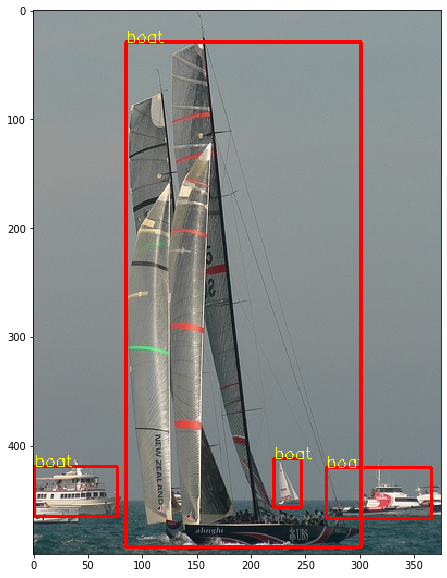

In [13]:
idx = 88
img = dataset[idx]['img']
boxlist = dataset[idx]['boxlist']

img = draw_box(img,boxlist)
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()

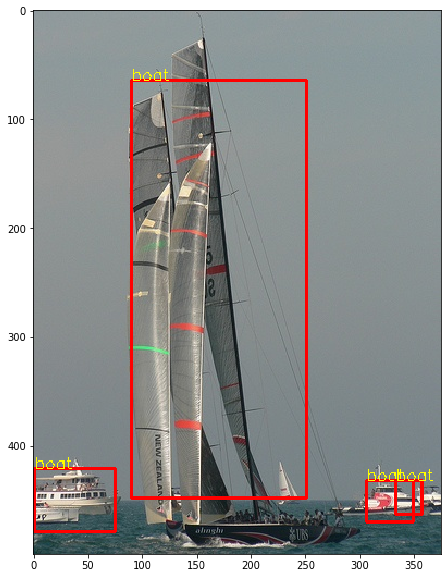

In [14]:
img = dataset[idx]['img']
img = cv2.resize(img,(448,448))
img = torch.from_numpy(img).float() / 255.

img = img.unsqueeze(0)
img = img.permute(0,3,1,2)
img = img.cuda()
boxlist = model(img)

img = dataset[idx]['img']

boxlist[0].resize((img.shape[1],img.shape[0]))
img = draw_box(img,boxlist[0],conf=0.2)
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()